In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Mlrepo/Kruskal-WallisTest /kruskal_wallis_data.csv')

In [7]:
# Ensure the 'group' column is treated as a categorical variable
data['group'] = data['group'].astype('category')

In [8]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

# Perform Kruskal-Wallis Test
groups = [data[data['group'] == group]['value'].values for group in data['group'].unique()]
statistic, p_value = kruskal(*groups)

    group      value
0  Group1  18.820262
1  Group1  12.000786
2  Group1  14.893690
3  Group1  21.204466
4  Group1  19.337790


In [9]:
# Display results
print(f"Kruskal-Wallis Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis Test:
Statistic: 66.69959844703271
P-value: 2.1713938989313905e-14


In [11]:
# Interpret the results
alpha = 0.05
if p_value >= alpha:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we do not reject the null hypothesis.")
else:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")

Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis.


<Figure size 1200x600 with 0 Axes>

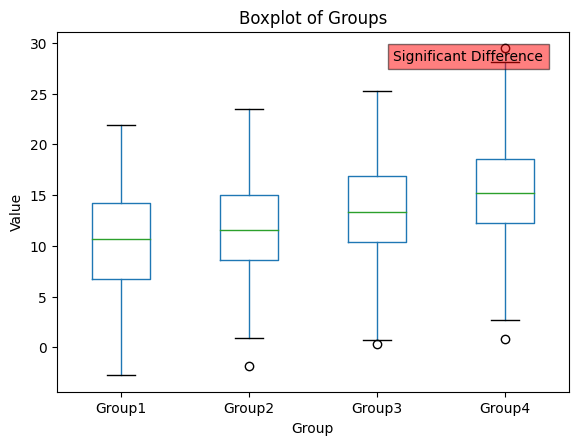

In [10]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Boxplot for visualization
data.boxplot(by='group', column='value', grid=False)
plt.title('Boxplot of Groups')
plt.suptitle('')
plt.xlabel('Group')
plt.ylabel('Value')

# Highlight significant difference if p-value < 0.05
alpha = 0.05
if p_value < alpha:
    plt.text(0.95, 0.95, "Significant Difference", ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.show()